<a href="https://colab.research.google.com/github/tutr464b/Spam-Filtering/blob/main/spam_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#load data, which is given by TU Dresden
!wget https://cloudstore.zih.tu-dresden.de/index.php/s/33N8STmyGMLi4NE/download -O sms_spam.txt

--2021-12-27 21:36:37--  https://cloudstore.zih.tu-dresden.de/index.php/s/33N8STmyGMLi4NE/download
Resolving cloudstore.zih.tu-dresden.de (cloudstore.zih.tu-dresden.de)... 141.30.62.64
Connecting to cloudstore.zih.tu-dresden.de (cloudstore.zih.tu-dresden.de)|141.30.62.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 477907 (467K) [application/octet-stream]
Saving to: ‘sms_spam.txt’

sms_spam.txt        100%[===================>] 466.71K   875KB/s    in 0.5s    

2021-12-27 21:36:38 (875 KB/s) - ‘sms_spam.txt’ saved [477907/477907]



In [37]:
#preview the data
with open('sms_spam.txt') as f:
  line = f.read()
  print(line[:5000])

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
ham	Ok lar... Joking wif u oni...
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
ham	U dun say so early hor... U c already then say...
ham	Nah I don't think he goes to usf, he lives around here though
spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
ham	Even my brother is not like to speak with me. They treat me like aids patent.
ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
spam	H

In [3]:
from collections import defaultdict
from tabulate import tabulate
import random
#import important libraries 

In [4]:
data = [line.split("\t") for line in open("sms_spam.txt")]
random.shuffle(data) #shuffle the data
upto = int(len(data)*0.8)
training_data, test_data = data[:upto], data[upto:]
#split the data to train and test data 

In [5]:
labels = [label for label, msg in training_data]
n_ham = labels.count("ham")
n_spam = labels.count("spam")
p_ham = float(n_ham)/len(labels)
p_spam = float(n_spam)/len(labels)

In [6]:
def msgToWords(msg):
  return set(msg.split())

In [7]:
ham, spam = defaultdict(int), defaultdict(int)
for label, msg in training_data:
  for word in msgToWords(msg):
    if label == "ham":
      ham[word] += 1
    else:
      spam[word] += 1
n_voc = len(set(list(ham.keys())+list(spam.keys())))

In [8]:
for label, msg in training_data:
  print(msg)
  print('/n')

Streaming output truncated to the last 5000 lines.

/n
Gokila is talking with you aha:)

/n
Carlos says he'll be at mu in  &lt;#&gt;  minutes

/n
K:)all the best:)congrats...

/n
They finally came to fix the ceiling.

/n
Multiply the numbers independently and count decimal points then, for the division, push the decimal places like i showed you.

/n
Have you always been saying welp?

/n
RGENT! This is the 2nd attempt to contact U!U have WON £1250 CALL 09071512433 b4 050703 T&CsBCM4235WC1N3XX. callcost 150ppm mobilesvary. max£7. 50

/n
Wat time liao, where still got.

/n
Now get step 2 outta the way. Congrats again.

/n
Ok...

/n
Congratulations ore mo owo re wa. Enjoy it and i wish you many happy moments to and fro wherever you go

/n
Jus finish blowing my hair. U finish dinner already?

/n
This is the 2nd time we have tried 2 contact u. U have won the 750 Pound prize. 2 claim is easy, call 08712101358 NOW! Only 10p per min. BT-national-rate

/n
Sounds great! Im going to sleep now. Hav

In [9]:
#calculate posibility
def predict(msg):
  p_msg_ham = 1.0 #to make sure it is type double
  p_msg_spam = 1.0
  for word in msgToWords(msg):
    p_msg_ham *= (ham[word] + 1) / (n_ham + n_voc)
    p_msg_spam *= (spam[word] + 1) / (n_spam + n_voc)
  if p_msg_ham * p_ham >= p_msg_spam * p_spam:
    return "ham"
  return "spam" 

the formal is the Laplace-smoothing. The plus 1 is to make it always different from 0

In [10]:
#predict spam or ham based on accuracy
tp, fp, tn, fn = 0.0, 0.0, 0.0, 0.0
for label, msg in test_data:
  predicted = predict(msg)
  if label == "spam" and predicted == "spam":
    tp += 1
  elif label == "ham" and predicted == "spam":
    fp += 1
  elif label == "ham" and predicted == "ham":
    tn += 1
  elif label == "spam" and predicted == "ham":
    fn += 1
precision = tp/(tp+fp)
recall = tp/(tp+fn)
accuracy = (tp+tn)/(tp+fp+tn+fn)

print("There are {} ({}%) ham and {} ({}%) spam SMS.".format(n_ham, round(p_ham*100, 1), n_spam, round(p_spam*100, 1)))
print("Precision is {}, recall {}, and accuracy {}".format(round(precision, 2), round(recall, 2), round(accuracy, 2)))

There are 3878 (87.0%) ham and 581 (13.0%) spam SMS.
Precision is 0.99, recall 0.72, and accuracy 0.96


In [14]:
from tabulate import tabulate
import random

example = []
for row in random.sample(data, 10):
  example.append(row)
print("\n10 randomly selected example messages:")
print(tabulate(example))


10 randomly selected example messages:
----  ------------------------------------------------------------------------------------------------------------------------------------------------------------
ham   Congrats. That's great. I wanted to tell you not to tell me your score cos it might make me relax. But its motivating me so thanks for sharing
ham   No message..no responce..what happend?
spam  Sunshine Quiz Wkly Q! Win a top Sony DVD player if u know which country the Algarve is in? Txt ansr to 82277. £1.50 SP:Tyrone
ham   Am only searching for good dual sim mobile pa.
ham   Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..
ham   Ü called dad oredi...
ham   Hello lover! How goes that new job? Are you there now? Are you happy? Do you think of me? I wake, my slave and send you a teasing kiss from across the sea
ham   Haha, my friend tyler literally just asked if you could get him a dubsack
spam  

In [27]:
print('Frequent ham words:')
for (word, freq) in sorted(ham.items(), key= lambda x:x[1], reverse=True)[:20]:
  print(word, end=" ")
print("\n")
print('Frequent spam words:')
for (word, freq) in sorted(spam.items(), key= lambda x:x[1], reverse=True)[:20]:
  print(word, end=" ")
print("\n")

common = set(ham.keys()).intersection(set(spam.keys()))
print("spam has %d words and ham has %d. They have %d in common"%(len(spam.keys()), len(ham.keys()), len(common)))
print("Frequent words in common:")
for word in sorted(common, key = lambda x:spam[x]+ham[x], reverse = True)[:20]:
  print(word, end = " ")



Frequent ham words:
to I you the a in i and is my me u for of that your on it have at 

Frequent spam words:
to a call or your the for you 2 is Call have from on with and of ur & 4 

spam has 7907 words and ham has 13732. They have 5906 in common
Frequent words in common:
to you I a the in and is i for my u of me your on have 2 that or 

In [28]:
import matplotlib.pyplot as plt

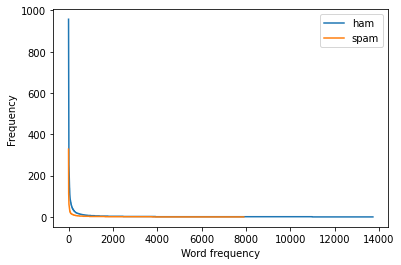

In [31]:
plt.plot(sorted(ham.values(), reverse = True)[0:], label="ham")
plt.plot(sorted(spam.values(), reverse = True)[0:], label="spam")
plt.ylabel('Frequency')
plt.xlabel("Word frequency")
plt.legend()
plt.show()

check the frequency of two words continuously

In [35]:
cooc = defaultdict(int)
for [label, msg] in data:
   words = msg.split()
   for i in range(len(words)-1):
     cooc[(words[i], words[i+1])] += 1
table = [[w1, w2,cooc[(w1, w2)]] for ((w1,w2),v) in sorted(cooc.items(), key=lambda x:x[1], reverse=True)[0:10]]
print(tabulate(table))


----  ---  --
I     am   88
in    the  86
are   you  81
have  a    80
to    be   77
want  to   77
will  be   76
in    a    74
.     .    73
you   are  70
----  ---  --
